Задание 3.
Загрузите данные по изменению температуры поверхности земли. Для этого может понадобится зарегистрироваться на Kaggle. Затем нужно будет работать с данными, которые содержатся в файле GlobalLandTemperaturesByMajorCity.csv

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import variance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
%matplotlib inline


df = pd.read_csv("C:\\Users\\UserOfPC\\Downloads\\brunoyam-ds-SC381-2952-main\\brunoyam-ds-SC381-2952-main\\data\\GlobalLandTemperaturesByMajorCity.csv")

df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E



#Задание 3.1 (1 балл)


В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый DataFrame, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.

In [292]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [293]:
df['dt'] = pd.to_datetime(df['dt'])
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [294]:
df_weather = df[df['dt'] >= '1950-01-01']
df_weather

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


#Задание 3.2 (2 балла)



Постройте график среднегодовых температур в городе Торонто.

In [295]:
df_weather_toronto = df_weather[df_weather['City'] == 'Toronto']
#сгруппировать по году и подсчет средней температуры
df_weather_toronto = df_weather_toronto.groupby(df_weather_toronto.dt.dt.year)['AverageTemperature'].mean()

Text(0, 0.5, 'Среднегодовая температура')

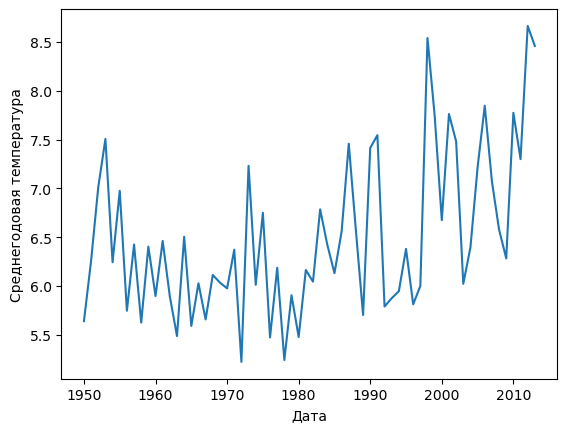

In [296]:
ax = df_weather_toronto.plot(x="dt",y="AverageTemperature")
ax.set_xlabel("Дата")
ax.set_ylabel("Среднегодовая температура")

#Задание 3.3 (2 балла)

 

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна.


#Задание 3.4 (4 балла)

In [297]:
#var() - Compute variance of groups, excluding missing values.
variance_AverageTemperature = df_weather.groupby(['City', 'Latitude'])['AverageTemperature'].var()
variance_AverageTemperature = variance_AverageTemperature.reset_index()
variance_AverageTemperature


,City,Latitude,AverageTemperature
0,Abidjan,5.63N,1.872387
1,Addis Abeba,8.84N,1.547273
2,Ahmadabad,23.31N,17.892557
3,Aleppo,36.17N,74.019427
4,Alexandria,31.35N,20.874709
...,...,...,...
95,Tokyo,36.17N,65.525785
96,Toronto,44.20N,98.306119
97,Umm Durman,15.27N,14.669129
98,Wuhan,29.74N,76.700857


In [298]:
# nlargest - Возвращает первые n строк, упорядоченных по столбцам в порядке убывания.
res = variance_AverageTemperature.nlargest(1, columns=["AverageTemperature"])
res

,City,Latitude,AverageTemperature
34,Harbin,45.81N,218.898616


Выборочная дисперсия температур на приведенных данных максимальна - для города Harbin

#Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:

1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

Text(0.5, 1.0, 'Зависимость выборочной дисперсии температур от широты города')

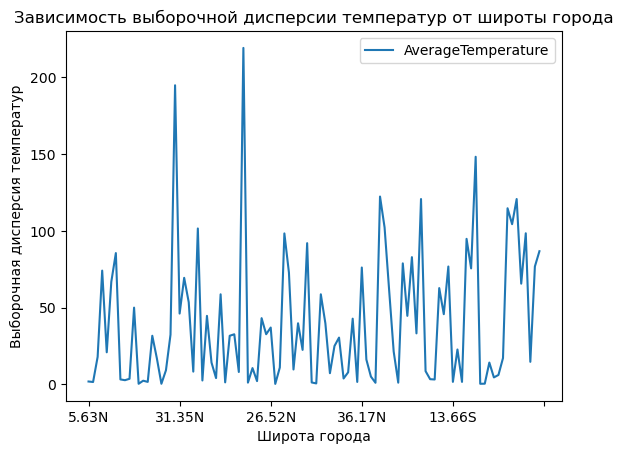

In [299]:
plt_1 = variance_AverageTemperature.plot(x="Latitude",y="AverageTemperature")
plt_1.set_xlabel("Широта города")
plt_1.set_ylabel("Выборочная дисперсия температур")
plt_1.set_title("Зависимость выборочной дисперсии температур от широты города")

Text(0.5, 1.0, 'Зависимость средней температуры в январе 1975 года от широты города')

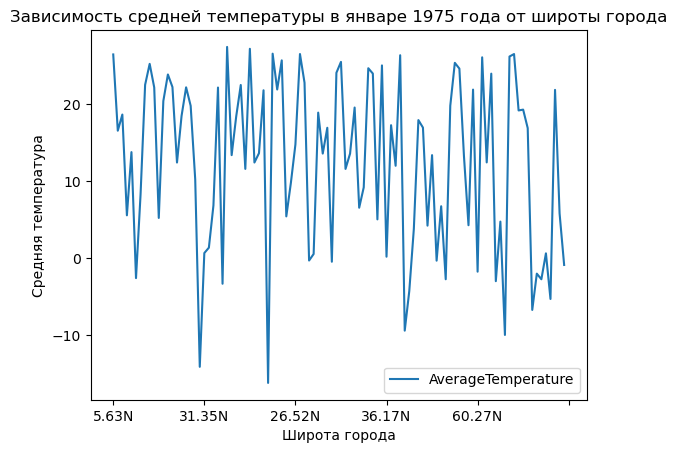

In [300]:
df_weather_jan_1975 = df_weather[(df_weather['dt'] >= '1975-01-01') & (df_weather['dt'] <= '1975-01-31')]
plt_2 = df_weather_jan_1975.plot(x="Latitude",y="AverageTemperature")
plt_2.set_xlabel("Широта города")
plt_2.set_ylabel("Средняя температура")
plt_2.set_title("Зависимость средней температуры в январе 1975 года от широты города")

Text(0.5, 1.0, 'Зависимость средней температуры в июле 1975 года от широты города')

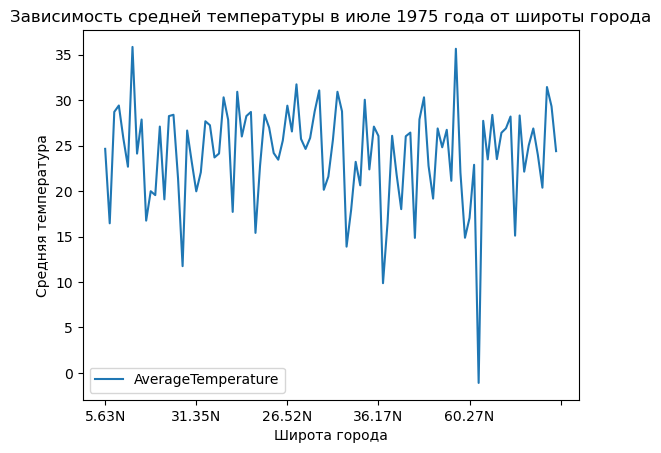

In [301]:
df_weather_jan_1975 = df_weather[(df_weather['dt'] >= '1975-07-01') & (df_weather['dt'] <= '1975-07-31')]
plt_2 = df_weather_jan_1975.plot(x="Latitude", y="AverageTemperature")
plt_2.set_xlabel("Широта города")
plt_2.set_ylabel("Средняя температура")
plt_2.set_title("Зависимость средней температуры в июле 1975 года от широты города")

#Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом).


In [302]:
#фильтруем по городу Спб, dt.dt.year - группируем по году, выводим среднюю температуру, сбрасываем мультииндекс
AverageTemperatureSPb = df_weather[df_weather['City'] == 'Saint Petersburg']
AverageTemperatureSPb = AverageTemperatureSPb.groupby(AverageTemperatureSPb.dt.dt.year)['AverageTemperature'].mean()
AverageTemperatureSPb = AverageTemperatureSPb.reset_index()
AverageTemperatureSPb

,dt,AverageTemperature
0,1950,4.424083
1,1951,4.308250
2,1952,3.749333
3,1953,4.840083
4,1954,4.454000
...,...,...
59,2009,5.177417
60,2010,4.239917
61,2011,6.056250
62,2012,4.661000


In [303]:
#определим года, в которых ср. температура в Спб была выше, чем в предыдущем и следующем.

df = pd.DataFrame(columns=['dt'])     #создаем два пустых датафрейма
df2 = pd.DataFrame(columns=['AverageTemperature'])

# в цикле с помощью конструкции - df.loc[ len(df.index )] - добавляем i строку в новые датафреймы
for i in range(1,63):
    if (AverageTemperatureSPb['AverageTemperature'].loc[i] > AverageTemperatureSPb['AverageTemperature'].loc[i-1]) & (AverageTemperatureSPb['AverageTemperature'].loc[i] > AverageTemperatureSPb['AverageTemperature'].loc[i+1]):
          df.loc[len(df.index )] = [AverageTemperatureSPb['dt'].loc[i]]
          df2.loc[len(df.index )] = [AverageTemperatureSPb['AverageTemperature'].loc[i]]
print(df)

      dt
0   1953
1   1957
2   1959
3   1961
4   1964
5   1967
6   1972
7   1975
8   1977
9   1979
10  1983
11  1986
12  1989
13  1992
14  1995
15  1997
16  2000
17  2002
18  2005
19  2008
20  2011


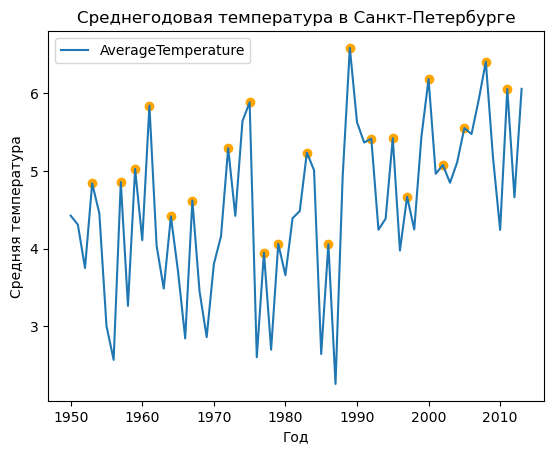

In [304]:
plt_2 = AverageTemperatureSPb.plot(x="dt", y="AverageTemperature")
plt_2.set_xlabel("Год")
plt_2.set_ylabel("Средняя температура")
plt_2.set_title("Среднегодовая температура в Cанкт-Петербурге")

# c помощью skatter добавим точки - df и df - датафреймы содержaщие года, в которых ср. температура в Спб 
# была выше, чем в предыдущем и следующем.
plt.scatter(df, df2, color='orange')

Постройте модель линейной регрессии (можно использовать LinearRegression): год ----> средняя температура. Отобразите на графике

In [305]:
#посмотрим есть ли у нас пустые ячейки в датасете
print(AverageTemperatureSPb.isnull().sum(axis = 0))

dt                    0
AverageTemperature    0
dtype: int64


In [306]:
AverageTemperatureSPb_1 = AverageTemperatureSPb.dropna(subset=['AverageTemperature'])

In [308]:
#добавим наши признаки в x_df
y_df = pd.DataFrame(AverageTemperatureSPb['AverageTemperature'])
x_df = pd.DataFrame(AverageTemperatureSPb['dt'])
x_df

,dt
0,1950
1,1951
2,1952
3,1953
4,1954
...,...
59,2009
60,2010
61,2011
62,2012


In [309]:
y_df

,AverageTemperature
0,4.424083
1,4.308250
2,3.749333
3,4.840083
4,4.454000
...,...
59,5.177417
60,4.239917
61,6.056250
62,4.661000


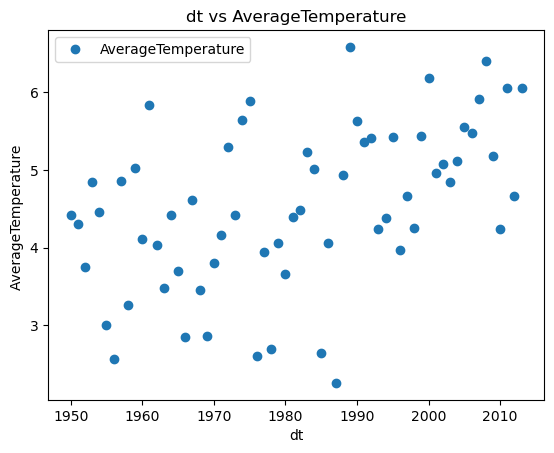

In [310]:
AverageTemperatureSPb.plot(x='dt', y='AverageTemperature', style='o')  
plt.title('dt vs AverageTemperature')  
plt.xlabel('dt')  
plt.ylabel('AverageTemperature ')  
plt.show()

In [311]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)
x_train.shape, x_test.shape

((51, 1), (13, 1))

In [312]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [313]:
y_pred = model.predict(x_test)
mean_squared_error(y_pred, y_test)

1.3397800945868434

In [314]:
def plot_graphs(x_test, y_test, y_pred):
    plt.figure()
    plt.xlabel('dt')
    plt.ylabel('AverageTemperature')
    plt.scatter(x_test['dt'], y_pred)
    plt.scatter(x_test['dt'], y_test)
    plt.legend(['Прогноз', 'Факт'])

    plt.figure()
    plt.scatter(y_pred, y_test)
    plt.xlabel('Прогнозные значения')
    plt.ylabel('Фактические значения')
    plt.show()

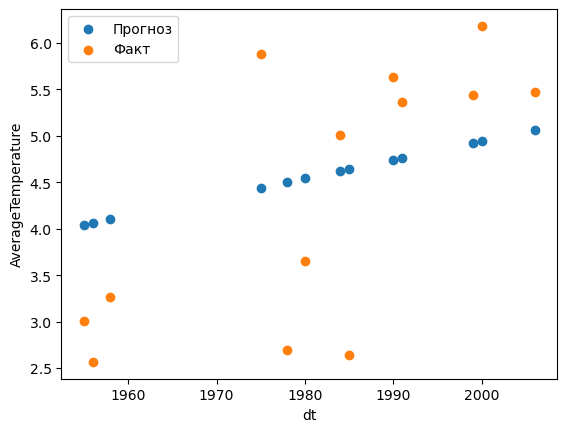

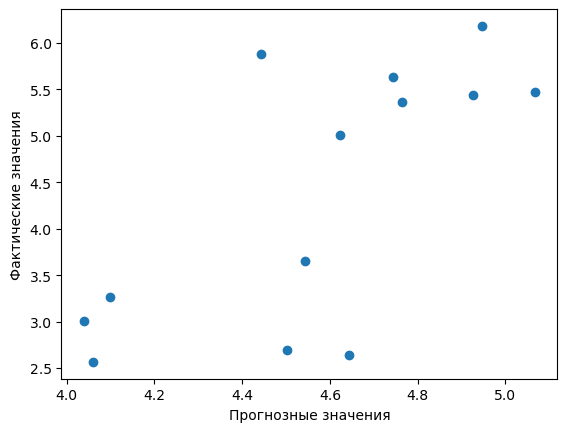

In [315]:
plot_graphs(x_test, y_test, y_pred)

#Задание 3.6 (4 балла)


Найдите города, для которых:

Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.

Самая большая средняя разница между средней температурой января и средней температурой июля.

Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [325]:

AverageTemperature_minmax = df_weather.groupby([df_weather['City'], df_weather.dt.dt.year ])['AverageTemperature'].mean()
AverageTemperature_minmax = AverageTemperature_minmax.reset_index()
AverageTemperature_minmax

,City,dt,AverageTemperature
0,Abidjan,1950,26.195417
1,Abidjan,1951,26.324750
2,Abidjan,1952,26.279500
3,Abidjan,1953,26.244417
4,Abidjan,1954,26.011083
...,...,...,...
6395,Xian,2009,12.528417
6396,Xian,2010,12.589750
6397,Xian,2011,12.075167
6398,Xian,2012,11.898167


In [326]:
#Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.

AverageTemperature_min_max = AverageTemperature_minmax.groupby([AverageTemperature_minmax['City']]).agg({'AverageTemperature': ['min', 'max']})

AverageTemperature_min_max.columns = AverageTemperature_min_max.columns.droplevel(0)

AverageTemperature_min_max['diff_max_min'] = AverageTemperature_min_max['max'] - AverageTemperature_min_max['min']

# nlargest - Возвращает первые n строк, упорядоченных по столбцам в порядке убывания.
res1 = AverageTemperature_min_max.nlargest(1, columns=["diff_max_min"])
res1

,min,max,diff_max_min
City,,,
Mashhad,10.6885,15.9385,5.25


Город Mashhad - имеет наибольшую разницу максимальной и минимальной среднегодовых температур

In [320]:
# Самая большая средняя разница между средней температурой января и средней температурой июля.

In [321]:
AverageTemperature_month = df_weather.groupby([df_weather['City'], df_weather.dt.dt.month ])['AverageTemperature'].mean()
AverageTemperature_month = AverageTemperature_month.reset_index()
AverageTemperature_month = AverageTemperature_month[(AverageTemperature_month.dt == 1) | (AverageTemperature_month.dt == 7)]

#diff() Вычисляет разницу элемента DataFrame по сравнению с другим элементом в DataFrame (по умолчанию это элемент в предыдущей строке).
AverageTemperature_month['diff'] = AverageTemperature_month['AverageTemperature'].diff()
AverageTemperature_month 

,City,dt,AverageTemperature,diff
0,Abidjan,1,26.984078,NaN
6,Abidjan,7,24.762531,-2.221547
12,Addis Abeba,1,17.468844,-7.293688
18,Addis Abeba,7,16.717750,-0.751094
24,Ahmadabad,1,19.709828,2.992078
...,...,...,...,...
1170,Umm Durman,7,31.476906,8.744984
1176,Wuhan,1,4.189859,-27.287047
1182,Wuhan,7,29.327500,25.137641
1188,Xian,1,-2.040672,-31.368172


In [322]:
res2 = AverageTemperature_month .nlargest(1, columns=["diff"])
res2

,City,dt,AverageTemperature,diff
414,Harbin,7,23.414297,41.992719


В городе Harbin - самая большая средняя разница между средней температурой января и средней температурой июля.

In [323]:
#Наибольшее среднее количество месяцев с отрицательной температурой в году.
res3 = df_weather[df_weather['AverageTemperature'] < 0]
res3 = res3.groupby([res3['City'], res3.dt.dt.month ])['AverageTemperature'].mean()
res3 = res3.reset_index()
res3 = res3.groupby(res3['City'])['dt'].count()
res3 = res3.reset_index()
res3

,City,dt
0,Ankara,4
1,Berlin,4
2,Changchun,5
3,Chengdu,3
4,Chicago,4
5,Dalian,4
6,Harbin,5
7,Jinan,3
8,Kabul,2
9,Kiev,5


In [324]:
res3 = res3.nlargest(1, columns=["dt"])
res3

,City,dt
14,Moscow,6


В городе Moscow - Наибольшее среднее количество месяцев с отрицательной температурой в году.